In [1]:
#Data exploration and visualization of 911 Call Data from the City of Seattle 

In [2]:
#Getting and working with data
import pandas as pd
import numpy as np
import math
import re
import os
import datetime as dt
import string
import scipy as sp

#Visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('poster', rc={'font.size':30,
                              'axes.titlesize':30,
                              'axes.labelsize':25})
#sns.set_context("poster")
#sns.set_style("dark")
#sns.set_style("ticks")
#import yellowbrick as yb

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [3]:
#Path for Call_Data.csv
path_Call_Data = '/Users/LiaG/Desktop/FIFI/Call_Data.csv'

In [34]:
#Read in csv file 
data = pd.read_csv(path_Call_Data)
data = pd.DataFrame(data = data)
data.reset_index(inplace=True, drop=True)

print('Original data shape:\n', data.shape, '\n')
print('Original data columns:\n', data.columns.values, '\n')

tail = data.tail(50)
print('Tail data shape:\n', tail.shape, '\n')

Original data shape:
 (4195926, 11) 

Original data columns:
 ['CAD Event Number' 'Event Clearance Description' 'Call Type' 'Priority'
 'Initial Call Type' 'Final Call Type' 'Original Time Queued'
 'Arrived Time' 'Precinct' 'Sector' 'Beat'] 

Tail data shape:
 (50, 11) 



In [79]:
#data.tail(50)
#print(data.dtypes)

In [87]:
#DATASET: Convert string object to Timestamp object for dataset
data['Original Time Queued'] = data['Original Time Queued'].apply(lambda x : pd.to_datetime(str(x)))

data['Original Time Queued']
data['Year'] = pd.DatetimeIndex(data['Original Time Queued']).year
data['Month'] = pd.DatetimeIndex(data['Original Time Queued']).month
data['Day of Week'] = pd.DatetimeIndex(data['Original Time Queued']).weekday
data['Hour'] = pd.DatetimeIndex(data['Original Time Queued']).hour

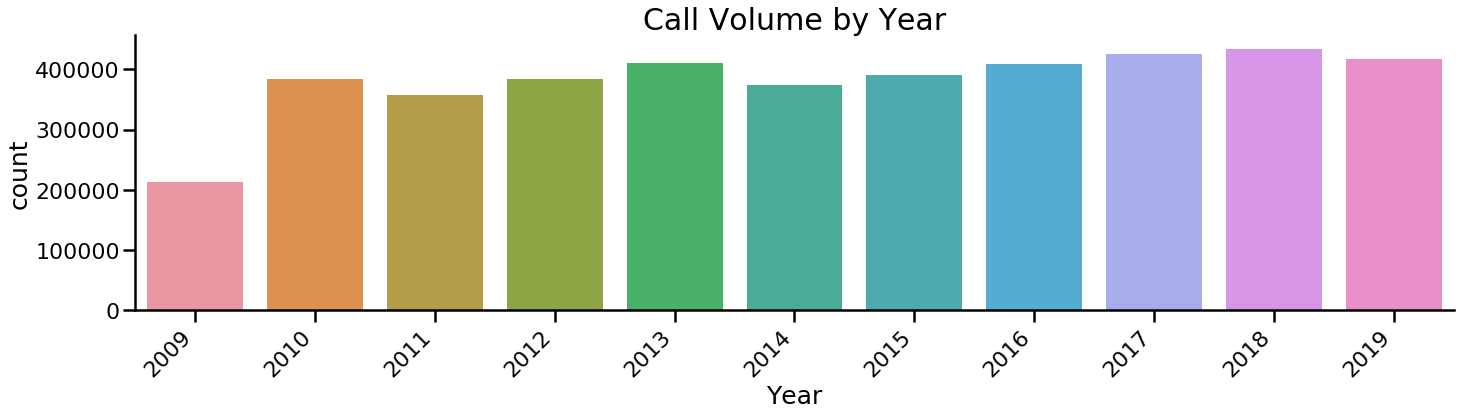

In [82]:
#How do counts change across years?
g = sns.catplot(x='Year', data=data, kind='count', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Call Volume by Year', y=1.25)
plt.subplots_adjust(hspace = 1.5)

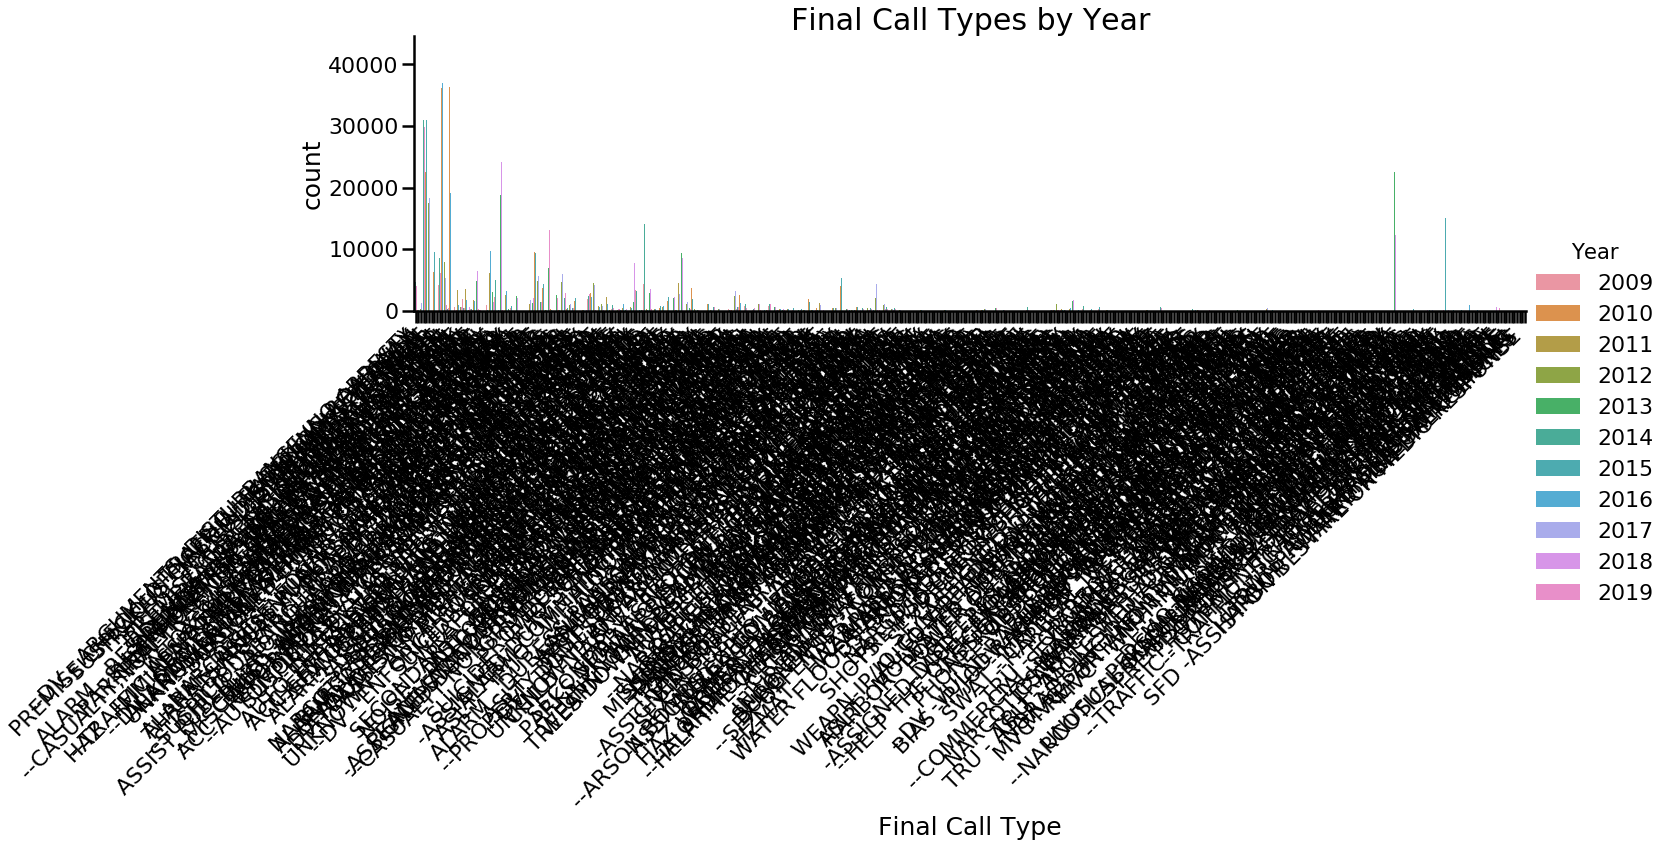

In [83]:
#How does Call Type change across year and category?
g = sns.catplot(x='Final Call Type', data=data, hue='Year', kind='count', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Final Call Types by Year', y=1.25)
plt.subplots_adjust(hspace = 1.5)

In [84]:
#Describe 'Final Call Type' column
final_call_type = data['Final Call Type'].value_counts()
print(final_call_type, end="\n\n")
print(data['Final Call Type'].describe())

--PREMISE CHECKS - CRIME PREVENTION                   373569
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON              343964
--DISTURBANCE - OTHER                                 299368
--TRAFFIC - MOVING VIOLATION                          246091
--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR)       217785
--TRAFFIC - MV COLLISION INVESTIGATION                186446
--ASSIST PUBLIC - OTHER (NON-SPECIFIED)               156469
--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE             101881
--PROWLER - TRESPASS                                   97706
--DIRECTED PATROL ACTIVITY                             93231
--CRISIS COMPLAINT - GENERAL                           93027
-OFF DUTY EMPLOYMENT                                   87864
--THEFT - CAR PROWL                                    87306
--MISCHIEF OR NUISANCE - GENERAL                       81448
--THEFT - ALL OTHER                                    80389
--DISTURBANCE - NOISE                                  72525
--ASSIST OTHER AGENCY - 

count                                 4195926
unique                                    418
top       --PREMISE CHECKS - CRIME PREVENTION
freq                                   373569
Name: Final Call Type, dtype: object


In [56]:
#read in excel file containing population and point in time count data across years

#data_PIT = pd.read_excel(path_PIT)
#data_PIT = pd.DataFrame(data = data_PIT)
#print(data_PIT.shape)

#add in number of FIFI requests by year
#data_PIT['FIFI_counts'] = data_complete.groupby('year')['FIFI_category'].count().values
#data_PIT

In [ ]:
#data_PIT.corr()

In [ ]:
#can we explain the increase in requests over time by population and/or point in time count data?
#g = sns.catplot(x='year', y='seattle pop', data=data_PIT, kind='bar', height=5, aspect=4)
#g.set_xticklabels(rotation=45, ha='right')
#plt.title('Seattle population by year', y=1.25)
#plt.subplots_adjust(hspace = 1.5)
#plt.show()

#g = sns.catplot(x='year', y='total', data=data_PIT, kind='bar', height=5, aspect=4)
#g.set_xticklabels(rotation=45, ha='right')
#plt.title('PIT total counts by year', y=1.25)
#plt.subplots_adjust(hspace = 1.5)
#plt.show()

#g = sns.catplot(x='year', y='sheltered', data=data_PIT, kind='bar', height=5, aspect=4)
#g.set_xticklabels(rotation=45, ha='right')
#plt.title('PIT sheltered by year', y=1.25)
#plt.subplots_adjust(hspace = 1.5)
#plt.show()

#g = sns.catplot(x='year', y='unsheltered', data=data_PIT, kind='bar', height=5, aspect=4)
#g.set_xticklabels(rotation=45, ha='right')
#plt.title('PIT unsheltered by year', y=1.25)
#plt.subplots_adjust(hspace = 1.5)
#plt.show()

#g = sns.catplot(x='year', y='camping reports', data=data_PIT, kind='bar', height=5, aspect=4)
#g.set_xticklabels(rotation=45, ha='right')
#plt.title('PIT camping reports by year', y=1.25)
#plt.subplots_adjust(hspace = 1.5)
#plt.show()

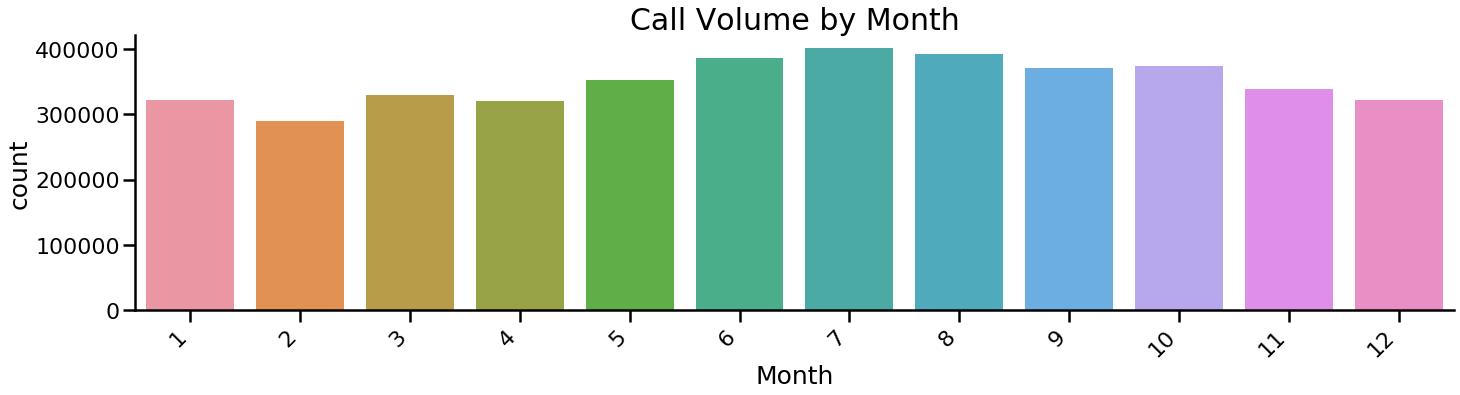

In [85]:
#Visualization of Call Volume by month
g = sns.catplot(x='Month', data=data, kind='count', ci=68, height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Call Volume by Month', y=1.25)
plt.subplots_adjust(hspace = 1.5)

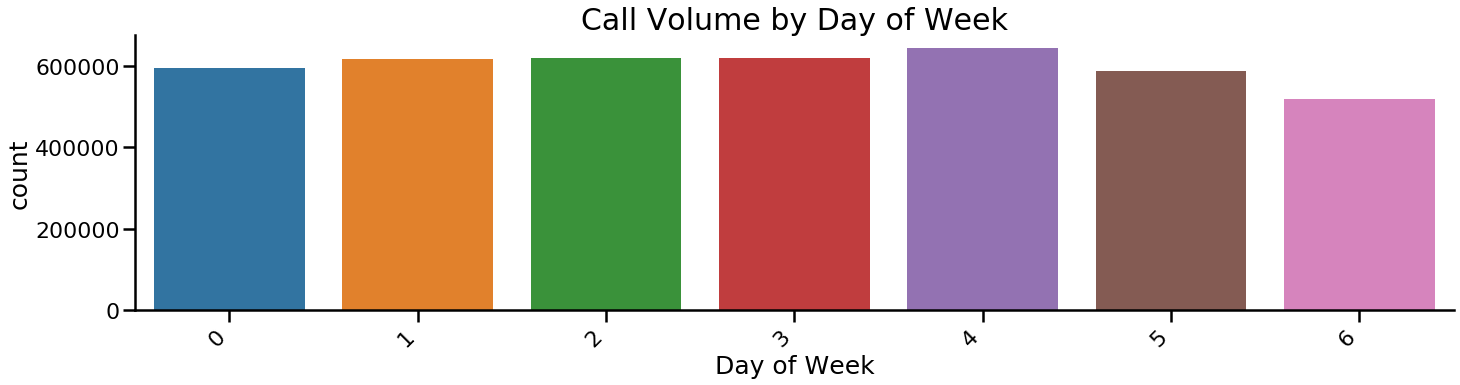

In [88]:
#Visualization of Call Volume by Day of the Week
g = sns.catplot(x='Day of Week', data=data, kind='count', ci=68, height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Call Volume by Day of Week', y=1.25)
plt.subplots_adjust(hspace = 1.5)

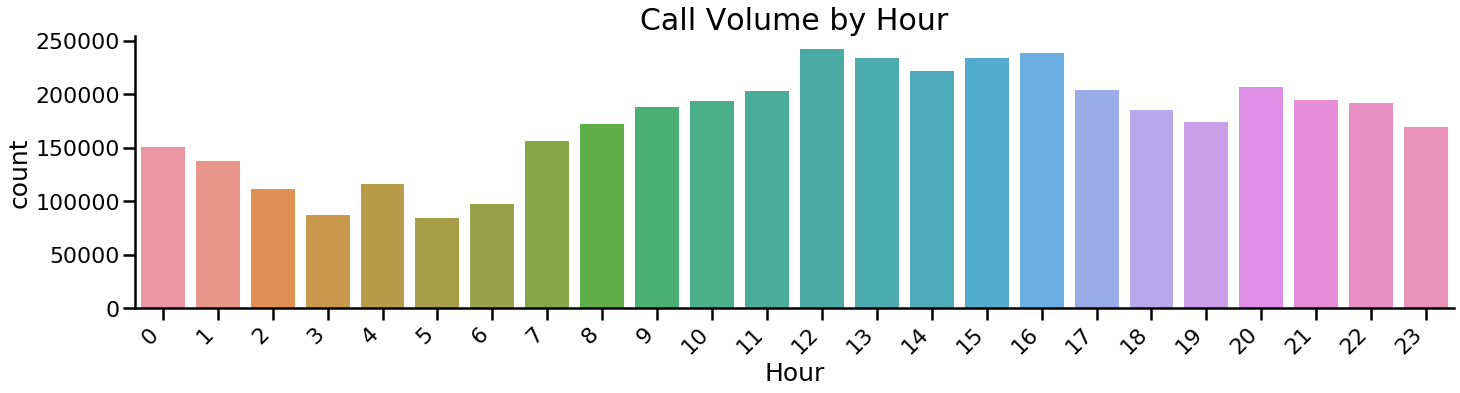

In [89]:
#Visualization of Call Volume by Hour
g = sns.catplot(x='Hour', data=data, kind='count', ci=68, height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Call Volume by Hour', y=1.25)
plt.subplots_adjust(hspace = 1.5)

In [77]:
#Describe 'Precinct' column
precinct = data['Precinct'].value_counts()
print(precinct, end="\n\n")
print(data['Precinct'].describe())

WEST         1245886
NORTH        1106913
SOUTH         690923
EAST          679395
SOUTHWEST     432949
UNKNOWN        39860
Name: Precinct, dtype: int64

count     4195926
unique          6
top          WEST
freq      1245886
Name: Precinct, dtype: object


In [78]:
#Describe 'Sector' column
sector = data['Sector'].value_counts()
print(sector, end="\n\n")
print(data['Sector'].describe())

KING       355535
MARY       353035
EDWARD     317692
DAVID      310406
UNION      258323
ROBERT     255904
SAM        243689
NORA       243141
BOY        242024
QUEEN      226910
WILLIAM    226083
FRANK      206866
LINCOLN    196398
OCEAN      191330
GEORGE     183345
CHARLIE    178358
JOHN       167027
Name: Sector, dtype: int64

count     4156066
unique         17
top          KING
freq       355535
Name: Sector, dtype: object


In [70]:
#Describe 'Beat' column
beat = data['Beat'].value_counts()
print(beat, end="\n\n")
print(data['Beat'].describe())

E2        149721
M3        144348
K3        143386
N3        117492
D2        117316
K2        113176
M2        104776
D1        104646
M1        104377
K1         99540
Q3         97194
U2         93846
R2         92883
W1         92619
U1         91969
D3         88590
S2         88536
E1         87818
R3         86603
O1         84303
B1         83177
B2         82481
E3         80782
S1         78525
N2         77074
Q2         77012
S3         76986
B3         76875
R1         76748
G2         76151
F1         74972
W2         73770
U3         73480
F2         67761
C1         67105
L2         66741
L3         65061
L1         64830
F3         64455
W3         61776
C3         60413
J3         58244
J1         58201
O2         57710
G3         54404
Q1         53311
G1         53309
C2         52368
J2         51632
O3         49518
N1         48754
99          8999
HS          2508
S           2388
DET         1622
N           1611
CTY         1560
W           1131
WS          10

In [ ]:
#How do counts change across neighborhoods?
g = sns.catplot(x='Neighborhood', data=tail[data_complete['zip'] != 'WA'], kind='count', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Call Volume per Neighboorhood', y=1.25)
plt.subplots_adjust(hspace = 1.5)

In [ ]:
#How do counts change across neighborhood and Call Type?
g = sns.catplot(x='Final Call Type', data=tail, col='Neighborhood', col_wrap=2, kind='count', ci=68, height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Call Type by Neighborhood', y=1.25)
plt.subplots_adjust(hspace = 1.5)

In [ ]:
data['Neighborhood'].value_counts()

### closer look at 2018

In [ ]:
#read in excel file containing meta data on zip codes in seattle for the year 2018
data_demogs = pd.read_excel(path_demogs)
data_demogs = pd.DataFrame(data = data_demogs)
data_demogs['zip'] = data_demogs['zip'].astype(str)

#select just data from 2018 and zips that have greater than 1000 entries
print(data.shape)
data_2018 = data[data['year'] == 2018]
print(data_2018.shape)
zip_counts = data_2018['zip'].value_counts()
zip_counts_1000 = zip_counts[zip_counts > 999].index.values
data_2018 = data_2018[data_2018['zip'].isin(zip_counts_1000)]
print(data_2018.shape)

#combine FIFI data with corresponding zip code meta data, use only 2018
counts_2018 = data_2018.groupby('zip')['zip'].count().reset_index(name='count')
data_2018_counts = pd.merge(counts_2018, data_demogs, on='zip', sort=False)
print(data_2018_counts.shape)
data_2018_counts.head(1)

#combine FIFI data with corresponding zip code meta data, use only 2018 and 'other'
counts_2018_other = data_2018[data_2018['FIFI_category'] == 'Other'].groupby('zip')['zip'].count().reset_index(name='count')
data_2018_other_counts = pd.merge(counts_2018_other, data_demogs, on='zip', sort=False)
print(data_2018_other_counts.shape)

#combine FIFI data with corresponding zip code meta data, use only 2018 and 'Needles/Dumping'
counts_2018_nd = data_2018[data_2018['FIFI_category'] == 'Needles/Dumping'].groupby('zip')['zip'].count().reset_index(name='count')
data_2018_nd_counts = pd.merge(counts_2018_nd, data_demogs, on='zip', sort=False)
print(data_2018_nd_counts.shape)

In [ ]:
#how do counts change across neighborhood?
g = sns.catplot(x='neighborhood', data=data_2018_counts, y='count', kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by neighborhood', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

g = sns.catplot(x='neighborhood', data=data_2018_other_counts, y='count', kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI "Other" requests by neighborhood', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

In [ ]:
#how do counts change by city and county council districts?
g = sns.catplot(x='city council', data=data_2018_counts, y='count', kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by city council', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

g = sns.catplot(x='county council', data=data_2018_counts, y='count', kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by county council', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

In [ ]:
#how do counts change by city and county council districts if only looking at the other category?
g = sns.catplot(x='city council', data=data_2018_other_counts, y='count', kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by city council', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

g = sns.catplot(x='county council', data=data_2018_other_counts, y='count', kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by county council', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

In [ ]:
#how do counts change by city and county council districts if only looking at the needles/dumping category?
g = sns.catplot(x='city council', data=data_2018_nd_counts, y='count', kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by city council', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

g = sns.catplot(x='county council', data=data_2018_nd_counts, y='count', kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by county council', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

In [ ]:
data_2018_counts_city = data_2018_counts[~data_2018_counts['city council'].isna()]
data_2018_counts_staying = data_2018_counts[~data_2018_counts['SittingInformal'].isna()]

In [ ]:
corr_variables = ['overdose', 'pop', 'pop_dens',
       'housing_units', 'med_home', 'land_area', 'occupied_units',
       'occupied_ratio', 'med_income', 'med_age', 'male_%', 'white_%',
       'fam_%', 'nokid_%', 'mortgage_%', 'fulltime_%', 'unemploy',
       'drive_%', 'publictrans_%', 'other_%', 'wrk_travel']

for variable in corr_variables:
    pearsonr, p_value = sp.stats.pearsonr(data_2018_counts_city['count'], data_2018_counts_city[variable])
    if p_value < 0.05:
        print('The ', variable, ' is significantly correlated!')
        print(pearsonr)
        print(p_value)
        print('\n')

In [ ]:
corr_variables = ['SittingInformal', 'Lying',
       'DisruptiveActivity_Aggressive', 'DisruptiveActivity_Intoxicated',
       'LivingActivities', 'Soliciting', 'overdose', 'pop', 'pop_dens',
       'housing_units', 'med_home', 'land_area', 'occupied_units',
       'occupied_ratio', 'med_income', 'med_age', 'male_%', 'white_%',
       'fam_%', 'nokid_%', 'mortgage_%', 'fulltime_%', 'unemploy',
       'drive_%', 'publictrans_%', 'other_%', 'wrk_travel']

for variable in corr_variables:
    pearsonr, p_value = sp.stats.pearsonr(data_2018_counts_staying['count'], data_2018_counts_staying[variable])
    if p_value < 0.05:
        print('The ', variable, ' is significantly correlated!')
        print(p_value)
        print('\n')

In [ ]:
sns.pairplot(data_2018_counts, x_vars='count', y_vars='overdose', kind='reg')

In [ ]:
#viz the percentage of FIFI request for each time segment within the 'Abnd_Vehicle' category by neighborhood
data_vehicle = data_2018[data_2018['FIFI_category'] == 'Abnd_Vehicle']

cars_zip_count = data_vehicle.groupby('neighborhood')['Time_parked'].count().reset_index(name='Total_count')
cars_zip_park_count = data_vehicle.groupby('neighborhood')['Time_parked'].value_counts().reset_index(name='Time_count')

for neighborhood in data_vehicle['neighborhood'].unique():
    percents = cars_zip_park_count[cars_zip_park_count['neighborhood'] == neighborhood]['Time_count'].values / \
    cars_zip_count[cars_zip_count['neighborhood'] == neighborhood]['Total_count'].values * 100
    
    cars_zip_park_count.loc[cars_zip_park_count['neighborhood'] == neighborhood, 'park_percents'] = percents
    
    
g = sns.catplot(x='neighborhood', data=cars_zip_park_count, y='park_percents', kind='bar', hue='Time_parked', \
               ci=68, height=5, aspect=4, hue_order=['Over 3 Days', 'Over 1 Week', 'Over 1 Month', 'Over 3 Months'])
g.set_xticklabels(rotation=45, ha='right')
plt.subplots_adjust(hspace = 1.2)

In [ ]:
g = sns.catplot(x='State', data=data_vehicle, kind='count', hue='Time_parked', \
               ci=68, height=5, aspect=4, hue_order=['Over 3 Days', 'Over 1 Week', 'Over 1 Month', 'Over 3 Months'])
g.set_xticklabels(rotation=45, ha='right')
plt.subplots_adjust(hspace = 1.2)

In [ ]:
data_needles = data_2018[data_2018['FIFI_category'] == 'Needles/Dumping']

g = sns.catplot(x='neighborhood', data=data_needles, kind='count', col='Type_of_item?', col_wrap=2, \
               ci=68, height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.subplots_adjust(hspace = 1.2)

In [ ]:
data_grafitti = data_2018[data_2018['FIFI_category'] == 'Grafitti']

g = sns.catplot(x='neighborhood', data=data_grafitti, kind='count', hue='Obscene/Racial/Hateful?', \
               ci=68, height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.subplots_adjust(hspace = 1.2)